# BIOFYSIKKPROSJEKT: Diffusjonsvektet MRI

Bibian Eriksen, Marius Bjerke Stjernstedt og Karianne Strand Bergem

## Introduksjon

I dette prosjektet skal vi se på diffusjonsvektet MRI. Først simulerer vi bevegelsen til vannmolekylers virrevandring, også kalt Brownske bevegelser, i én og to dimensjoner. Videre lager vi en representasjon av virrevandrerne i et område med tumorer. Til slutt plotter vi intensiteteten av vannmolekylenes diffusjon i vevet. 

## Oppgave 1
### a)

Diffusjon i én dimensjon svarer til den partielle differensiallikningen

$$\frac{\partial\phi(x,t)}{\partial t} = \frac{\partial}{\delta x}(D(x)\frac{\partial\phi(x,t)}{\partial x})$$

der $\phi(x,t)$ er tettheten av et stoff i posisjon $x$ og ved tid $t$ og $D(x)$ kalles diffusjonskonstanten. 

Vi vil vise at hvis $\phi$ er sannsynlighetstettheten til en normalfordeling med forventningsverdi $\mu = 0$ og varians lik $\sigma^2 = at$, så løser den diffusjonslikningen 

$$\frac{\partial\phi(x,t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial x^2},$$

der diffusjonskonstanten $D$ er konstant for alle posisjoner $x$.

Sannsynlighetstettheten til en normalfordeling er gitt ved
$$\phi(x,t) = \frac{1}{\sqrt{2\pi}} \frac{1}{\sigma} e^{-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}}.$$

Med forventningsverdi $\mu = 0$ og varians $\sigma^2 = at$ er

$$\phi(x,t) = \frac{1}{\sqrt{2\pi}} \frac{1}{\sqrt{at}} e^{-\frac{1}{2} \frac{x^2}{at}}.$$

Finner de partiellderiverte av sannsynlighetstettheten

$$\frac{\partial\phi(x,t)}{\partial t} = \frac{1}{2} \frac{-a{e}^{-\frac{1}{2} \frac{x^2}{at}}t\sqrt{at\pi} + e^{-\frac{1}{2} \frac{x^2}{at}}x^2\sqrt{at\pi}}{\sqrt{2}a^2t^3\pi} $$

$$\frac{\partial^2\phi(x,t)}{\partial x^2} = \frac{-a{e}^{-\frac{1}{2} \frac{x^2}{at}}t\sqrt{at\pi} + e^{-\frac{1}{2} \frac{x^2}{at}}x^2\sqrt{at\pi}}{\sqrt{2}a^3t^3\pi}$$

Setter disse inn i diffusjonslikningen og løser for $a$. Dette gir 

$$a = 2D.$$

$D$ er gitt ved

$$D = \frac{{(\Delta x)}^2}{2\Delta t}.$$

Både $\Delta x$ og $\Delta t$ er definert til å være lik 1. Dermed blir $D = \frac{1}{2}$ og $a = 1$ som er et analytisk resultat for variansen som skal sammenliknes med den empiriske variansen senere. 


### b)
Videre simuleres virrevandringen til èn enkelt virrevandrer i èn dimensjon med Algoritme 1 fra oppgaveheftet. I kodeblokken under har vi implementert denne i funksjonen algoritme_1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from scipy.optimize import curve_fit


def algoritme_1(M, p_r):
    """
    Beskrivelse
    -------
    Simulerer endimensjonal virrevandring til 1 partikkel.
    ---
    Parameters
    ----------
    M = antall tidssteg
    p_r = sannsynlighet for å gå til høyre
    ---
    Returns
    -------
    posisjon = array med virrevandrerens posisjon i rom for hvert tidssteg
    timesteps = array med tidssteg
    ---
    """      
    delta_x = 1 #størrelse på posisjonssteg
    tid = 0     #variabel som lagrer tidspunktet for hvert steg. Har startverdi lik 0.
    
    timesteps = np.arange(0, M)                  #tidssteg, fra 0 til M
    posisjon = np.zeros(M)                       #posisjon, initielt et array med nullere av lengde M
    tilfeldigeTall = np.random.uniform(0, 1, M)  #array med M uniformt fordelt tilfeldige tall mellom 0 og 1. 
                                                 
    
    for i in range(1, M):
        
        if tilfeldigeTall[i] < p_r:                 #sannsynlighet for å flytte 1 steg til venstre (? litt usikker her)
            posisjon[i] = posisjon[i-1] + delta_x   #flytter 1 steg til høyre fra posisjonen ved forrige tidssteg

        else:
            posisjon[i] = posisjon[i-1] - delta_x   #flytter 1 steg til venstre fra posisjonen ved forrige tidssteg
    
    
    return posisjon, timesteps

### c)

Vi plotter tre forskjellige simuleringer av virrevandring ved bruk av funksjonen fra forrige oppgave. Sannsynligheten for å gå til høyre ved hvert tidssteg ($p_r$) er satt lik henholdsvis $0.45$, $0.5$ og $0.55$. Vi har brukt $M = 1000$ tidssteg, noe som er tilstrekkelig til at vi tydelig ser i plottet at retningen til virrevandreren er bestemt av $p_r$. 

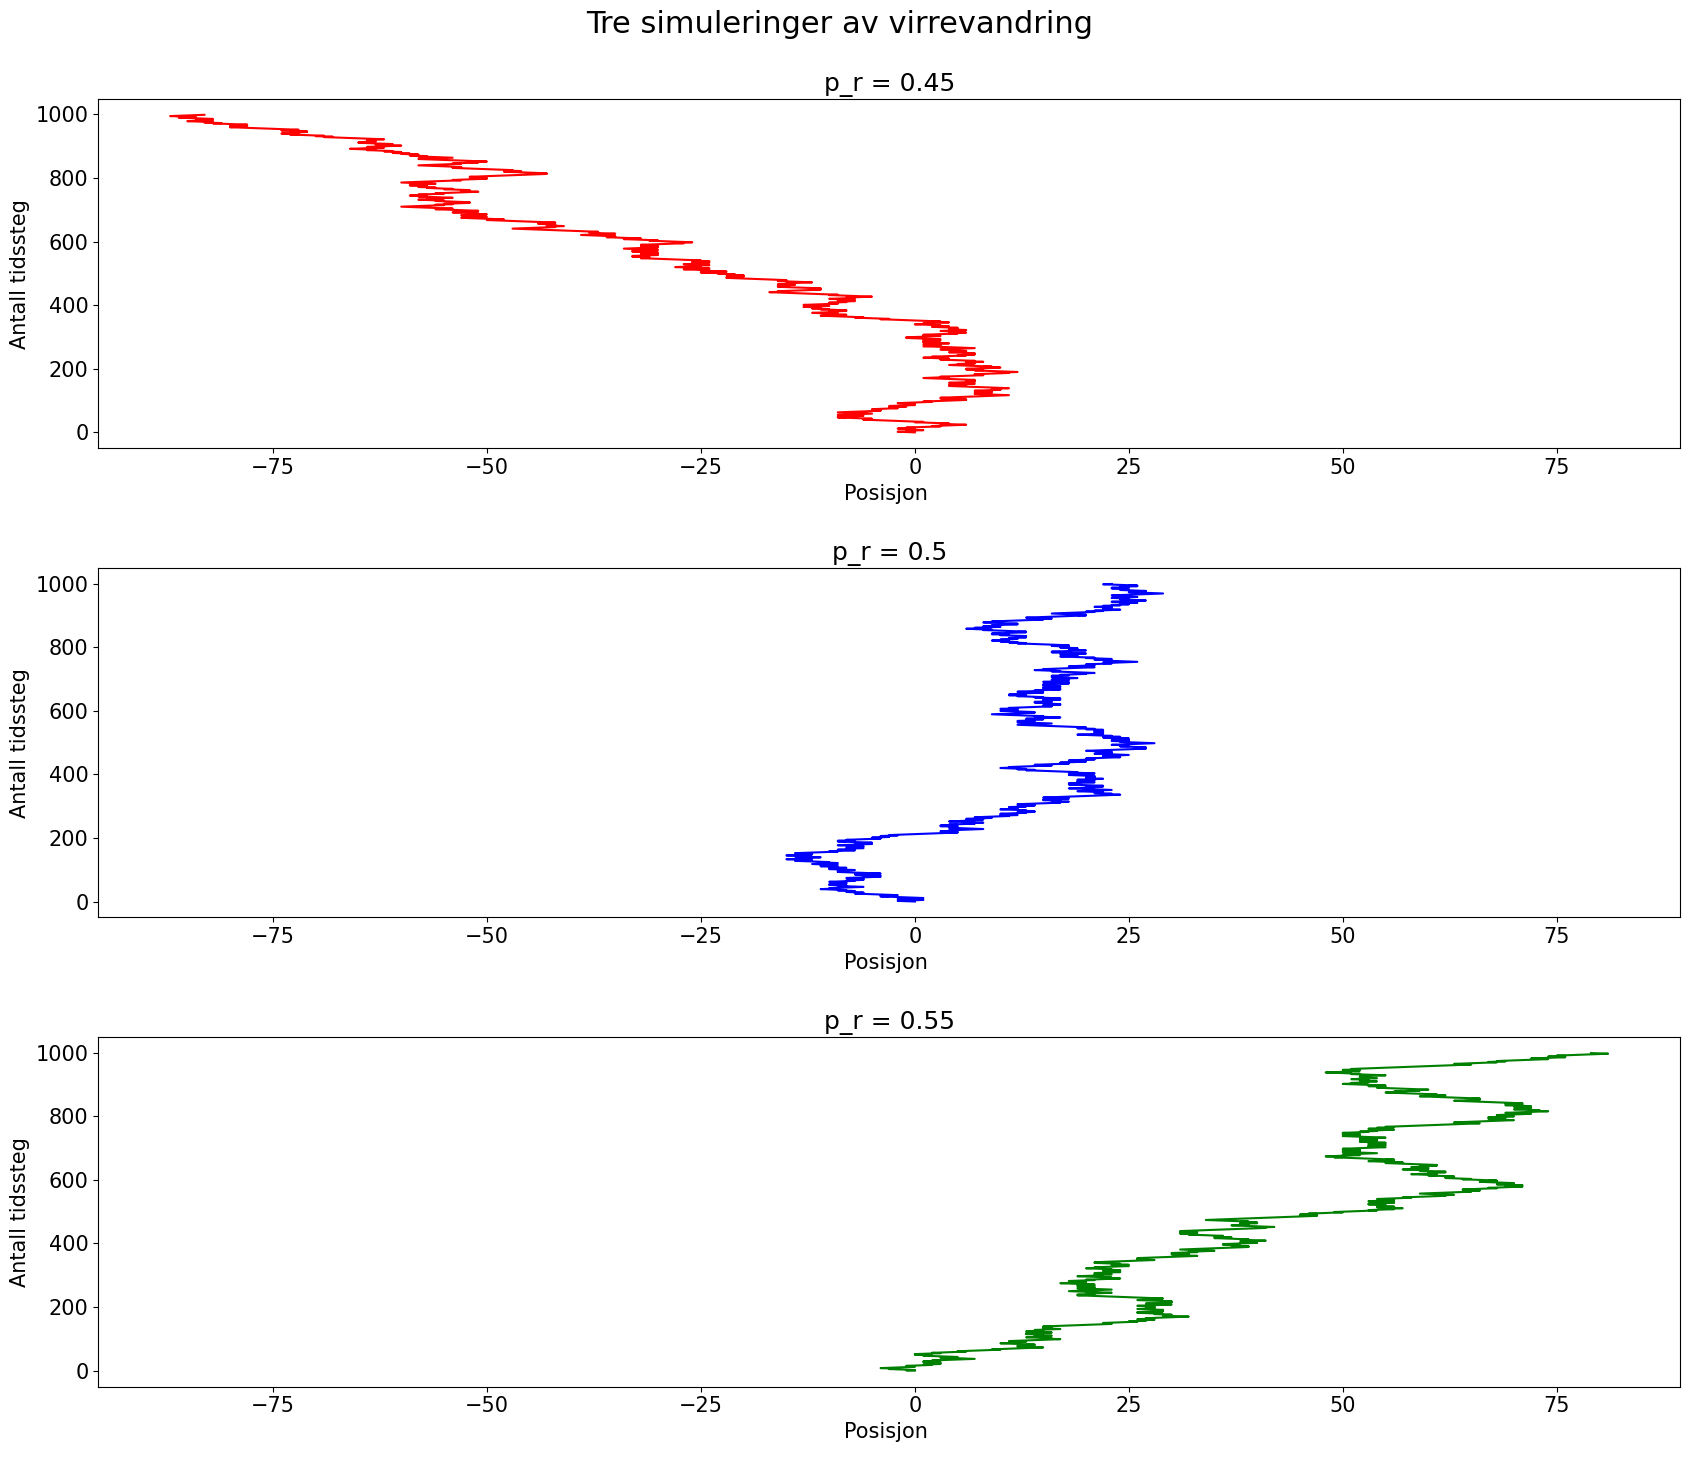

In [2]:
M = 1000                            #antall tidssteg
pos_sim_1 = algoritme_1(M, 0.45)[0] #posisjoner med p_r = 0.45
pos_sim_2 = algoritme_1(M, 0.5)[0]  #posisjoner med p_r = 0.5
pos_sim_3 = algoritme_1(M, 0.55)[0] #posisjoner med p_r = 0.55

timesteps = algoritme_1(M, 0.5)[1]  #tidsstegene. her spiller det ingen rolle hvilken p_r vi bruker,
                                    #fordi dette er en liste med heltall fra 0 til M-1.


#plotter de tre simuleringene under hverandre. 
fig, axes = plt.subplots(3, 1, figsize = (17, 15), sharex = "all")
                    
fig.suptitle('Tre simuleringer av virrevandring \n', size = 22)

axes[0].plot(pos_sim_1, timesteps, 'r')
axes[0].set_title('p_r = 0.45', size = 18)

axes[1].plot(pos_sim_2, timesteps, 'b')
axes[1].set_title('p_r = 0.5', size = 18)

axes[2].plot(pos_sim_3, timesteps, 'g')
axes[2].set_title('p_r = 0.55', size = 18)


for i in range(3):
    axes[i].set_xlabel('Posisjon \n', size = 15)
    axes[i].set_ylabel('Antall tidssteg', size = 15)
    axes[i].tick_params(which='both', labelbottom=True, labelsize = '15')



fig.tight_layout()   
plt.show()  


I plottet ser vi at jo større $p_r$ er, jo større tendens har virrevandreren til å bevege seg mot høyre.

### d)
Vi utvider funksjonaliteten til funksjonen i forrige oppgave, slik at den gjør simuleringer for flere virrevandrere samtidig. Antall virrevandrere tas inn som en parameter $N$. Her er koden skrevet for å være lett å forstå, mens kjørehastighet ikke har blitt tatt hensyn til.

In [3]:
def N_virrevandrere(M, p_r, N):
    """
    Beskrivelse
    -------
    Simulerer endimensjonal virrevandring til N partikler.
    ---
    Parameters
    ----------
    M = antall tidssteg
    p_r = sannsynlighet for å gå til høyre
    N = antall virrevandrere
    ---
    Returns
    -------
    posisjon = 2D array med hver virrevandrers posisjon i rom for hvert tidssteg
    timesteps = array med tidssteg
    ---
    """   
    
    delta_x = 1                                          #størrelse på posisjonssteg
    timesteps = np.arange(0, M)                          #tidssteg, fra 0 til M
    posisjon_2D = np.zeros((N, M))                       #2D-array med posisjoner, N rader (1 rad = 1 virrevandrer) og M kolonner (hver kolonne er et tidspkt)
    tilfeldigeTall_2D = np.random.uniform(0, 1, (N, M))  #2D-array med M uniformt fordelt tilfeldige tall mellom 0 og 1.
                                                         #1 rad av lengde M for hver virrevandrer, totalt N rader

    
    for j in range(N):        #for hver virrevandrer
        for i in range(1, M): #for hvert tidssteg
        
            if tilfeldigeTall_2D[j][i] < p_r:                      
                posisjon_2D[j][i] = posisjon_2D[j][i-1] + delta_x  #flytter virrevandrer nr. j 1 steg til høyre fra posisjonen ved forrige tidssteg
                
            else:
                posisjon_2D[j][i] = posisjon_2D[j][i-1] - delta_x   #flytter virrevandrer nr. j 1 steg til venstre fra posisjonen ved forrige tidssteg

    
    
    return posisjon_2D, timesteps

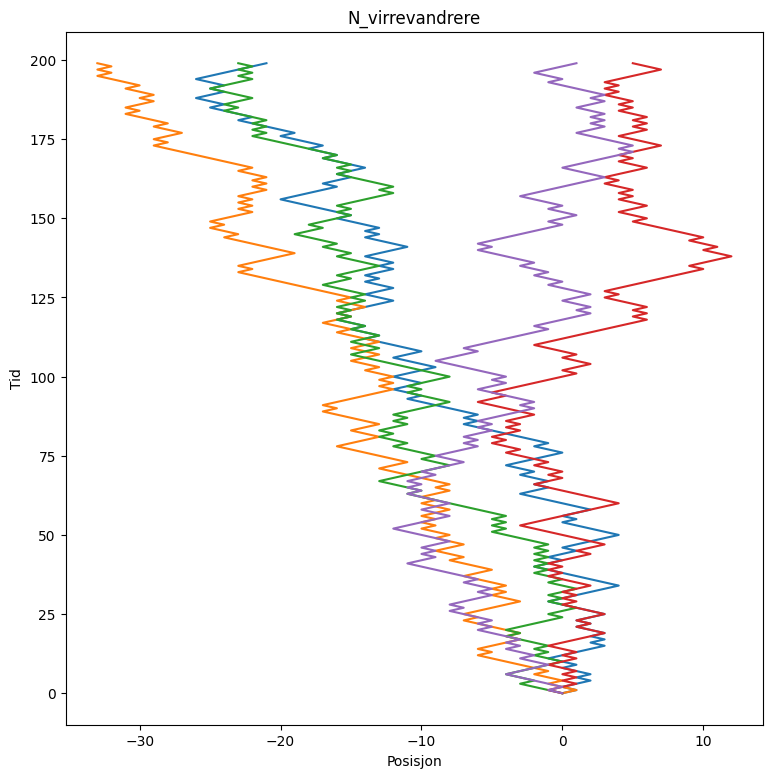

In [4]:
#Tester koden

plt.figure(figsize= (9,9))
plt.title("N_virrevandrere")
posisjoner, tider = N_virrevandrere(200, 0.5, 5)  #100 tidssteg, p_r=0.5, 5 virrevandrere. 
for element in posisjoner:
    plt.plot(element, tider)
    
plt.xlabel('Posisjon')
plt.ylabel('Tid')
plt.show()  

Vi ser at funksjonen fungerer som den skal; alle virrevandrerne starter i origo, og bevegelsen til høyre/venstre er tilsynelatende tilfeldig, noe som stemmer overens med at $p_r = 0.5$.

### e)

Her har vi skrevet en ny variant av funksjonen i oppgave 1d), som kjører ca. $30-40$ ganger raskere enn den opprinnelige funksjonen. Denne kjører med bare én for-løkke, mens den opprinnelige brukte to. I stedet for å sjekke hvert enkelt element i posisjon_2D med en if-setning og enten legge til eller trekke fra delta_x til dette, genererer den nye funksjonen heller en matrise med tilfeldig valgte steg (enten $-1$ eller $1$). Virrevandrerens posisjon blir et array med den kumulative summen av stegene den har tatt. Til dette brukes numpy-funksjoner, som er kjent for å være raske. Dermed spares mye tid, siden man slipper å kjøre igjennom alle elementene i posisjon_2D og tilfeldigeTall_2D. 

In [5]:
def N_virrevandrere_raskere(M, p_r, N):
    """
    Beskrivelse
    -------
    Denne funksjonen gjør det samme som N_virrevandrere, men er raskere
    ---
    Parameters
    ----------
    M = antall tidssteg
    p_r = sannsynlighet for å gå til høyre
    N = antall virrevandrere
    ---
    Returns
    -------
    posisjon = 2D array med hver virrevandrers posisjon i rom for hvert tidssteg
    timesteps = array med tidssteg
    ---
    """  
    posisjon = np.empty((N, M))        #tomt numpy-array, N rader og M kolonner               
    timesteps = np.arange(0, M)        #tidssteg, fra 0 til M
    
    #2D array som inneholder N arrays med M verdier på enten 1 eller -1. 
    #Den velger 1 med sannsynlighet p_r, og -1 med sannsynlighet 1-p_r.
    steg = np.random.choice([-1, 1], size = (N, M), p=[1-p_r, p_r])  
    for i in range(N):
        steg[i][0] = 0   #setter startposisjon for virrevandrerne i origo
        posisjon[i] = np.cumsum(steg[i]) #legger til N arrayer med posisjonene til hver virrevandrer
    
    return posisjon, timesteps


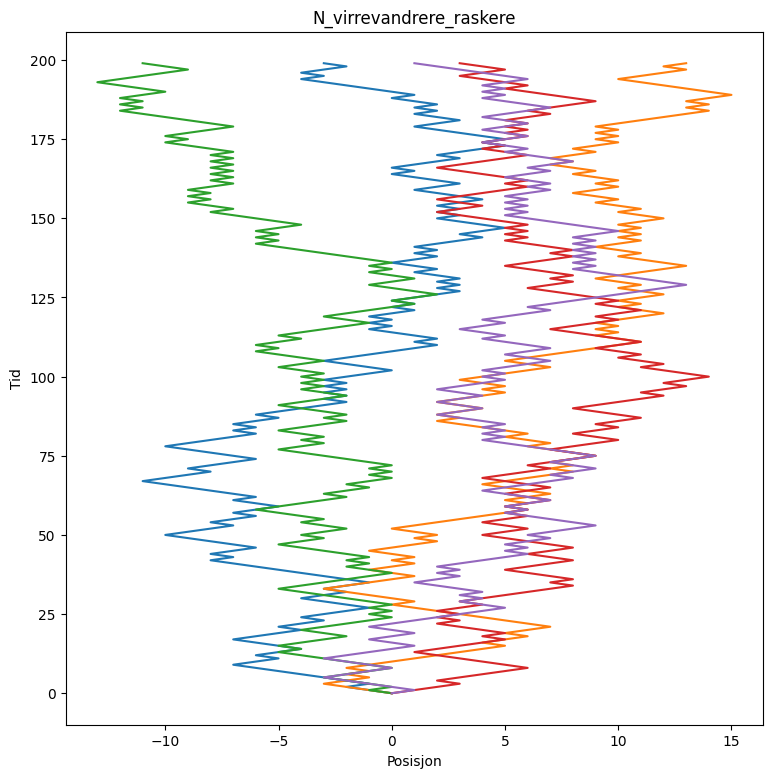

In [6]:
#Tester koden

plt.figure(figsize= (9,9))
plt.title("N_virrevandrere_raskere")
posisjoner, tider = N_virrevandrere_raskere(200, 0.5, 5)  #100 tidssteg, p_r=0.5, 5 virrevandrere. 
for element in posisjoner:
    plt.plot(element, tider)
    
plt.xlabel('Posisjon')
plt.ylabel('Tid')
plt.show()

Plottet ser tilsvarende ut som i forrige oppgave.

Sammenlikning av kjøretiden til funksjonene fra 1d og 1e:

In [7]:
if __name__ == "__main__":
    print("N_virrevandrere: ", np.round(timeit.timeit("N_virrevandrere(1000, 0.5, 1000)","from __main__ import N_virrevandrere", number = 1), 5), "s")
    print("N_virrevandrere_raskere: ", np.round(timeit.timeit("N_virrevandrere_raskere(1000, 0.5, 1000)","from __main__ import N_virrevandrere_raskere", number = 1), 5), "s")


N_virrevandrere:  0.66062 s
N_virrevandrere_raskere:  0.0268 s


Vi ser betydelig forskjell i kjøretidene, N_virrevandrere_raskere er ca. 30 ganger raskere.

### f)
Her har vi plottet den empiriske variansen som funksjon av tid. 

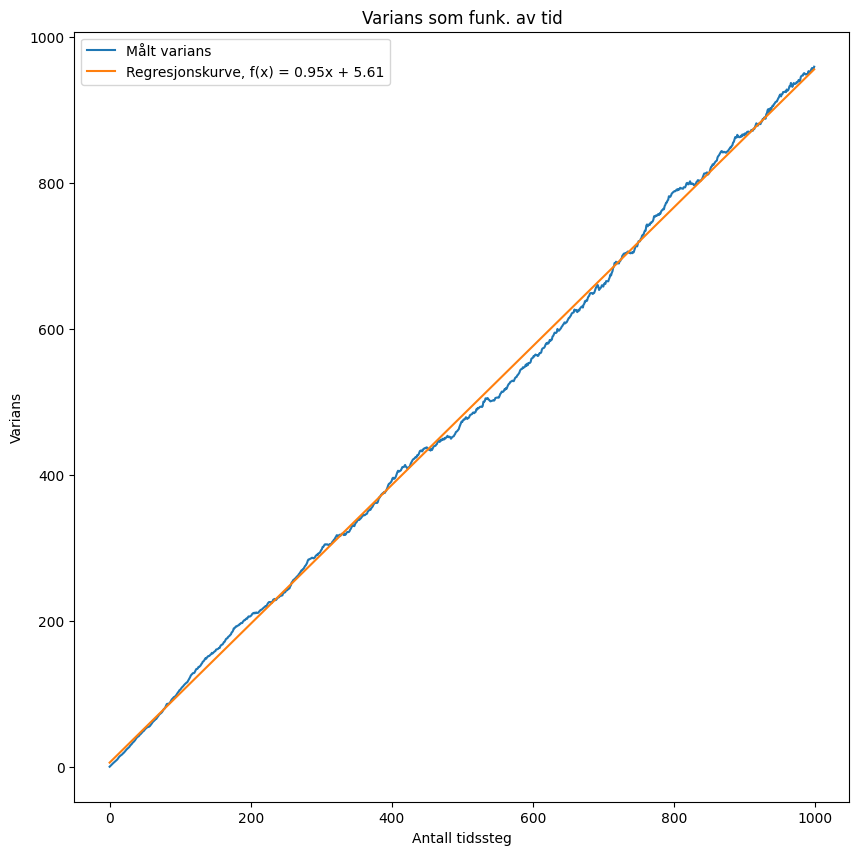

In [8]:
N_posisjoner, tider = N_virrevandrere_raskere(1000, 0.5, 1000)

transponert = N_posisjoner.T   #Bytter om slik at vi får M rader med posisjonene til hver virrevandrer for hvert tidspkt
varians = np.zeros(1000)       #varians for 1000 tidspunkter
for i in range(len(transponert)):
    row_variance = np.var(transponert[i])  #Regner ut variansen til hver rad
    varians[i] = row_variance
 
def rett_linje(x, a, b):
    return a*x + b
 

opt, noe = curve_fit(f= rett_linje, xdata = tider, ydata = varians)
a = opt[0]
b= opt[1]

#plotter
plt.figure(figsize = (10, 10))
plt.title("Varians som funk. av tid")
plt.plot(tider, varians, label= "Målt varians")
plt.plot(tider, rett_linje(tider, a, b), label = f"Regresjonskurve, f(x) = {a:.2f}x + {b:.2f}")
plt.xlabel('Antall tidssteg')
plt.ylabel('Varians')
plt.legend()
plt.show()

Vi ser at variansen øker tilnærmet lineært med tiden. Dette er fordi virrevandrerne beveger seg lenger og lenger vekk fra hverandre etter hvert som tiden går; det blir større spredning i posisjonene deres. Sannsynlighetstettheten til virrevandrernes posisjon kan tilnærmes med en normalfordeling med forventning $\mu = 0$ og varians $\sigma^2 = at$. I oppgave 1a) regnet vi ut at $a = 1$ hvis denne sannsynlighetstettheten skal være en løsning av diffusjonslikningen, med steglengde og tidssteg lik $1$ (slik de er definert i denne oppgaven). Ved bruk av scipy.curve_fit har vi tilpasset en rett linje til variansen for å se hvor godt dette stemmer med vår simulering. Stigningstallet til den tilpassede linja er på ca. $1 \pm 0.5$ (avhengig av simuleringen), noe som passer godt overens med det forventede resultatet. 

Siden variansen er en funksjon av tiden med stigningstall $a$, vil ikke flere tidssteg (altså en større $M$), forandre stigningstallet. For å få større samsvar med resultatet i oppgave 1a), må man heller øke antall virrevandrere (større $N$). Dette er på grunn av sentralgrenseteoremet, som sier at sannsynlighetsfordelingen til en sum eller et gjennomsnitt av uavhengige stokastiske variabler går mot en normalfordeling når antall ledd i summen eller antall variabler man tar gjennomsnitt over går mot uendelig. (https://tma4245.math.ntnu.no/viktige-kontinuerlige-fordelinger/normalfordeling/sentralgrenseteoremet/). Her blir den stokastiske variabelen den enkelte virrevandrers posisjon, og vi må derfor la N gå mot uendelig for at resultatene skal stemme med det eksakte uttrykket for variansen til en normalfordeling.

### g)
I denne oppgaven har vi laget en funksjon som simulerer bevegelsen til N virrevandrere i to dimensjoner. I tillegg til $p_r$ tar den inn parameteren $p_u$, som er sannsynligheten for at virrevandreren beveger seg ett steg oppover. Den beveger seg enten horistonalt eller vertikalt ved hvert tidssteg og med lik sannsynlighet. 

In [9]:
#Definerer funksjonen
def N_virrevandrere_2D(M, p_r, p_u, N):
    """
    Beskrivelse
    -------
    Simulerer virrevandring til N partikler i 2 dimensjoner.
    ---
    Parameters
    ----------
    M = antall tidssteg
    p_r = sannsynlighet for å gå til høyre
    p_u = sannsylighet for å gå oppover
    N = antall virrevandrere
    ---
    Returns
    -------
    xpos = 2D array med x-koordinatene til hver virrevandrer for hvert tidssteg
    ypos = 2D array med y-koordinatene til hver virrevandrer for hvert tidssteg
    ---
    """ 

    xpos = np.empty((N, M))        #tomt numpy-array, N rader og M kolonner
    ypos = np.empty((N, M))        #tomt numpy-array, N rader og M kolonner                  
    timesteps = np.arange(0, M)        #tidssteg, fra 0 til M
    
    for i in range(N): 
        retning = np.random.choice([0, 1], M)  #0 = flytt i x-retn, 1 = flytt i y-retn.
        xflytt = np.where(retning == 0)[0]      #indekser for horisontale flytt
        yflytt = np.where(retning == 1)[0]      #indekser for vertikale flytt
        steg_x = np.zeros(M)
        steg_y = np.zeros(M)
        xrand = np.random.choice([-1, 1], len(xflytt),  p=[1-p_r, p_r]) 
        yrand = np.random.choice([-1, 1], len(yflytt), p=[1-p_u, p_u])
        for j in range(len(xflytt)):
            steg_x[xflytt[j]] = xrand[j]  #tar steg til venstre/høyre på indekser for horisontal forflytning
        for k in range(len(yflytt)):
            steg_y[yflytt[k]] = yrand[k]  #tar steg opp/ned på indekser for vertikal forflytning
        steg_x[0] = 0                     #setter startposisjon for virrevandrerne i origo
        steg_y[0] = 0
        xpos[i] = np.cumsum(steg_x)  #legger til N arrayer med x-posisjonene til hver virrevandrer
        ypos[i] = np.cumsum(steg_y)  #legger til N arrayer med y-posisjonene til hver virrevandrer
    
    
    return xpos, ypos



Under har vi plottet to plott av virrevandringen til fire partikler i to dimensjoner. Det første plottet viser et isotropt system ($p_r = p_u = 0.5$), det andre et anisotropt system ($p_u = 0.4$ og $p_r = 0.7$).

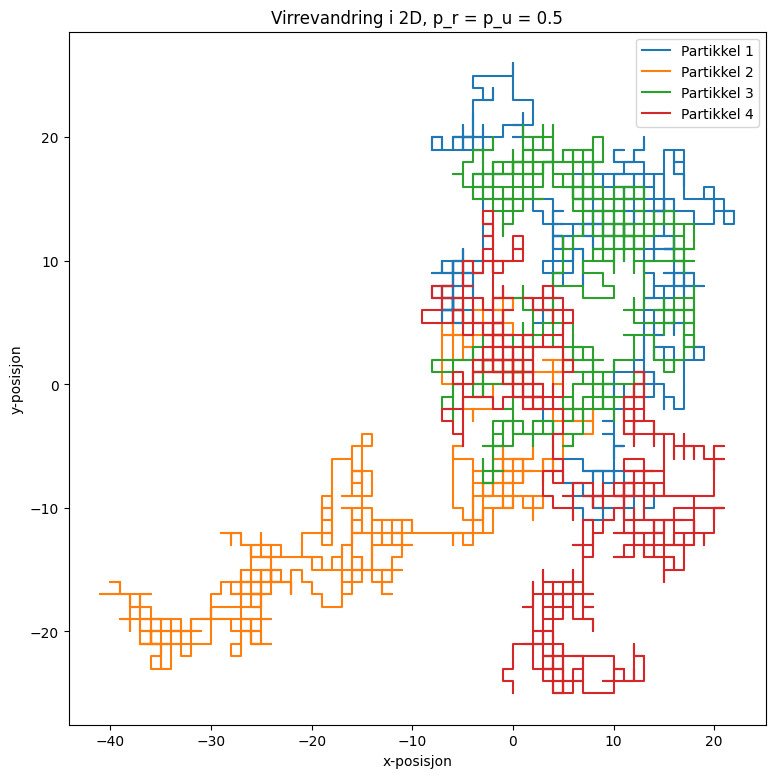

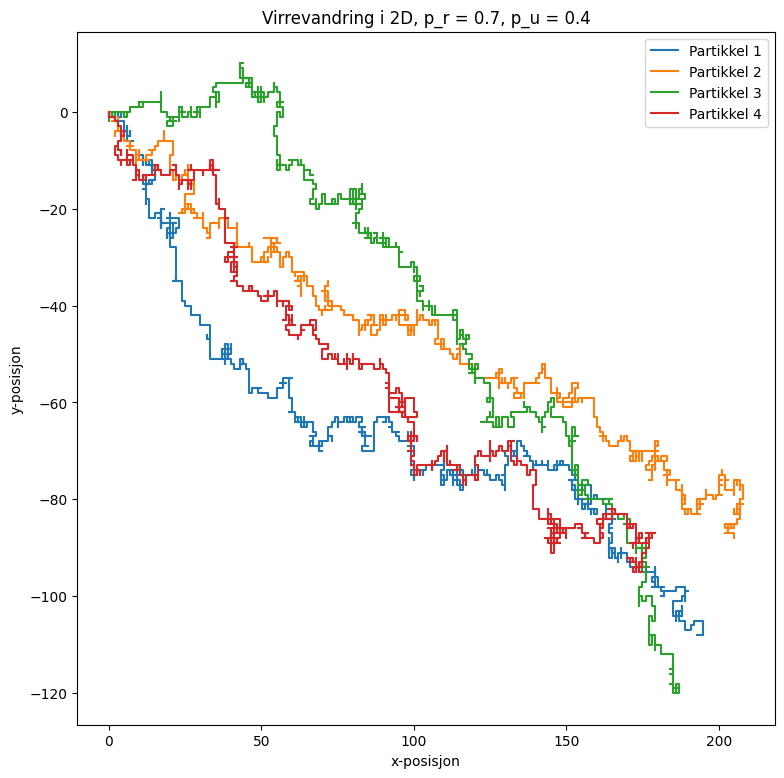

In [10]:
# Plotter i 2D

#Isotropt system
plt.figure(figsize = (9,9))
x_isotrop, y_isotrop = N_virrevandrere_2D(1000, 0.5, 0.5, 4)
for i in range(len(x_isotrop)):
    plt.plot(x_isotrop[i], y_isotrop[i], label = f"Partikkel {i+1}")
plt.xlabel('x-posisjon')  
plt.ylabel('y-posisjon') 
plt.legend()
plt.title('Virrevandring i 2D, p_r = p_u = 0.5') 

#Anisotropt system
plt.figure(figsize = (9,9))
x_anisotrop, y_anisotrop = N_virrevandrere_2D(1000, 0.7, 0.4, 4)
for i in range(len(x_anisotrop)):
    plt.plot(x_anisotrop[i], y_anisotrop[i], label = f"Partikkel {i+1}")
plt.xlabel('x-posisjon')  
plt.ylabel('y-posisjon') 
plt.legend()
plt.title('Virrevandring i 2D, p_r = 0.7, p_u = 0.4') 
plt.show()

I det isotrope systemet ser vi at virrevandrerne beveger seg i tilfeldige retninger, uten noen tydelig trend. I det anisotrope systemet har derimot virrevandrerne en tendens til å bevege seg nedover til høyre. Dette er som forventet ut ifra verdiene $p_r$ og $p_u$, som vi har satt slik at sannsynligheten er større for å bevege seg til høyre enn til venstre, og lavere for å bevege seg oppover enn nedover.

### h)
Sannsynligheten $P(x=0, t)$  for at én virrevandrer som starter i origo har returnert til origo etter $t$ tidssteg, er avhengig av antall dimensjoner den kan bevege seg i. Her har vi regnet ut den analytiske løsningen i én og to dimensjoner etter ett og to tidssteg.

I én dimensjon: 
$ P(x=0, t=1) = 0.$ Etter 1 tidssteg har virrevandreren flyttet seg 1 steg vekk fra origo. Den har ikke hatt tid til å returnere enda. 
$P(x=0, t=2) = 0.5.$ Etter 2 tidssteg kan virrevandreren enten flytte tilbake til origo, eller ta 1 steg videre.


I to dimensjoner:
$ P(x=0, t=1) = 0,$ av samme grunn som i én dimensjon. 
$P(x=0, t=2) = 0.25.$ Etter to tidssteg kan virrevandreren enten flytte tilbake til origo, eller ta ett steg til en av de tre andre retningene den kan bevege seg i.

Andelen virrevandrere som har returnert til origo ved tiden $t$, er definert ved funksjonen $n(t)$. I kodeblokken under har vi implementert $n(t)$ til for én og to dimensjoner. 


In [11]:
def n(N, M, dim, p_r = 0.5, p_u = 0.5):
    """
    Beskrivelse
    -------
    Denne funksjonen beregner andelen av virrevandrene som har besøkt origo minst én gang
    i løpet av en tid t for en simulering. Fungerer i 1 og 2 dimensjoner.   
    ---
    Parameters
    ----------
    N = antall virrevandrere
    M = antall tidssteg
    dim = antall dimensjoneer for simuleringen. Har enten verdien 1 eller 2.
    p_r = sannsynlighet for å gå til høyre (Standard=0.5)
    p_u = sannsylighet for å gå oppover (Standard=0.5)
    ---
    Returns
    -------
    andel = array med andel av virrevandrere som har besøkt origo minst en gang ved hvert tidssteg
    tidssteg = array med tidssteg
    ---
    """           
    antall_per_tidssteg = np.zeros(M)
    tidssteg = np.arange(0, M)                  #tidssteg, fra 0 til M
        
    if dim == 1:
        pos = N_virrevandrere_raskere(M, p_r, N)[0]
        for element in pos:
            try: #ikke alle virrevandrere krysser origo, hvis de ikke gjør det, hopper vi bare over dem
                andre_null_indeks = np.where(element == 0)[0][1]  #finner tidspunkt hvor virrevandreren krysser origo for første gang
                antall_per_tidssteg[andre_null_indeks:] += 1 #legger til 1 for alle tidspunkt etter første_null_indeks
            except:
                pass
        
        
    elif dim == 2:
        xpos, ypos = N_virrevandrere_2D(M, p_r, p_u, N)
        for i in range(N):                                            #for hver virrevandrer
            origo = np.where((xpos[i] == ypos[i]) & (xpos[i] == 0))   #sjekker om virrevandreren har vært innom origo. 
            origo_indekser = origo[0]   #array med indekser for alle steder der virrevandreren er innom origo
            if len(origo_indekser) > 1:       #hvis virrevandreren har vært innom origo minst en gang. Denne er satt til >1, fordi alle virrevandrerne starter i origo.
                antall_per_tidssteg[origo_indekser[1]:] +=1 #legger til 1 på alle tidspunkter etter at virrevandreren først var innom origo (hvis man ikke regner med startposisjonen)
     
    andel = antall_per_tidssteg/N
    return andel, tidssteg     
            

### i)
Deretter plotter vi $n(t)$ for et isotropt system med $N = 1000$, i én og to dimensjoner. 

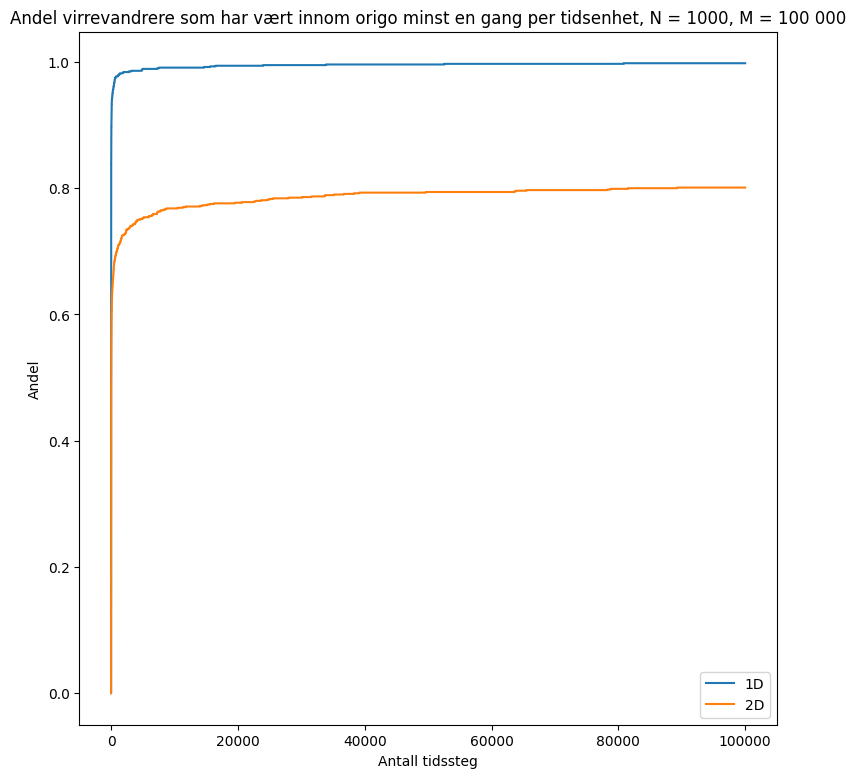

In [12]:
plt.figure(figsize = (9,9))

endim_andeler = n(1000, 100000, 1)[0]
todim_andeler, tidssteg = n(1000, 100000, 2)
plt.plot(tidssteg, endim_andeler, label = "1D")
plt.plot(tidssteg, todim_andeler, label = "2D")
plt.title("Andel virrevandrere som har vært innom origo minst en gang per tidsenhet, N = 1000, M = 100 000")
plt.xlabel("Antall tidssteg")
plt.ylabel("Andel")
plt.legend()
plt.show()

Vi ser at $n(t)$ øker raskt i begynnelsen, men svært langsomt etter en viss tid har gått. Dette er grunnet at de fleste virrevandrerne vil være i nærheten av origo etter en kort tid, mens de vil være mye mer spredd utover etter lang tid. De virrevandrerne som enda ikke har krysset origo vil derfor stort sett være langt unna origo, og frekvensen for hvor ofte en av disse krysser origo blir lav. 

Antall tidssteg $M$ er valgt så stor som mulig siden vi er interessert i grensetilfellet $t \rightarrow \infty$. I både én og to dimensjoner er den analytiske grenseverdien lik 1. Fra plottet vårt, ser vi at andelen i én dimensjon går mot 1 ganske raskt. I to dimensjoner, ser det derimot ut som ca. 80 % av virrevandrerne har returnert til origo etter 100 000 tidssteg. Vi trenger antakeligvis enda flere tidssteg for at andelen skal nærme seg 100 %. Det ser ut som om denne grafen stiger svært, svært langsomt...

Vi har valgt $N = 1000$ for å ha et tilstrekkelig stort tall til å se en relativt glatt kurve samtidig som vi ikke vil belaste simuleringen for mye. Ved for små $N$, vil andelen én virrevandrer utgjør være stor nok til at grafen blir hakkete og man ser når hver enkelt virrevandrer krysser origo.

## Oppgave 2

### a)
Videre skal det undersøkes hvordan vannmolekyler diffunderer i et område med friskt vev og tumorer i hjernen. Dette kan måles med diffusjonskonstanten i MRI som kalles ADC. Denne diffusjonskonstanten oppgis i enhet mm$^2$s$^{-1}$. Derfor inkluderes fysiske enheter for fremtidige simuleringer. I dette prosjektet inkluderes dette ved å skrive inn i alle lengder i mm. 

For friskt vev brukes parametrene $\Delta x = 0.004$mm og $\Delta t = 0.01$s for å gi en realistisk ADC for diffusjon av vannmolekyler i det friske vevet i hjernen. For denne steglengden og tidssteg finner vi diffusjonskonstanten som skal brukes for friskt vev i resten av prosjektet:


In [13]:
dt = 0.01 #s
dx = 0.004 #mm
ADC = dx**2/ (2*dt)
print(f"Diffusjonskonstanten i friskt vev for posisjonsendring lik 0.004 mm og tidssteg lik 0.01 s er {ADC:.3e} mm^2/s.")

Diffusjonskonstanten i friskt vev for posisjonsendring lik 0.004 mm og tidssteg lik 0.01 s er 8.000e-04 mm^2/s.


### b)

Celletettheten er høyere i tumorer og her blir diffusjonskonstanten lavere. Det er derfor hensiktsmessig å implementere funksjonalitet for dette når diffusjon i et område skal undersøkes. Hver enkelt tumor reduserer diffusjonskonstanten med tilhørende reduksjonskoeffisient $t_k$ og dermed steglengden $\Delta x$ med $\sqrt{t_k}$. Dersom tumorer overlapper, reduseres steglengden med kvadratroten av produktet av reduksjonskoeffisientene for hver tumor som overlapper i dette steget. Vi antar sirkulære tumorer og undersøker et slikt område. Implementerer da funksjonalitet for å finne de effektive steglengdene der virrevandrerne beveger seg i et slikt område: 



In [14]:
import numpy as np

def effektiv_dx(x, y, a, m, s1, s2, tk):
    """
    Beskrivelse
    -------
    Tar inn alle x og y kordinater til en virrevandrer og sammenligner dem med sentrum tumor posisjoner.
    Hvis en virrevandrer er innenfor en tumor vil det neste steget den tar minkes med roten av tk for gitt tumor den er i.
    ---
    Parameters
    ----------
    x : 2D array med x-koordinatene til hver virrevandrer for hvert tidssteg
    y : 2D array med y-koordinatene til hver virrevandrer for hvert tidssteg
    a : arealet til tumorene
    m : antall tumorer
    s1 : 1D array med x-koordinatene til sentrum i hver tumor
    s2 : 1D array med y-koordinatene til sentrum i hver tumor
    tk : 1D array med reduksjonskoeffisientene til hver tumor
    ---
    Returns
    -------
    Dx : Den effektive verdien til posisjonsendringen i hvert punkt (x,y)
    ---
    """
    r = np.sqrt(a/np.pi)
    Dx = dx*np.ones(x.shape) 
    for i in range(m):
        Dx = np.where((x-s1[i])**2 + (y-s2[i])**2 <= r**2, Dx*np.sqrt(tk[i]), Dx)
    return Dx 

### c)
I denne oppgaven foretar vi en simulering med $N = 2$ og $M = 1000$ i et system med $15$ tumorer med tilhørende reduksjonskoeffisienter lik $1$. Til dette har vi laget en ny funksjon N_virr_2D_tumor, som er en variant av N_virrevandrere_2D fra oppgave 1g). Forskjellen er at denne funksjonen også implementerer grensebetingelser. I tillegg er virrevandrernes startposisjon ikke satt i origo, men til et tilfeldig sted i  $LxL$.

In [15]:
###-------Biblioteker og konstanter---------
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage
from matplotlib.image import NonUniformImage

m = 15               #Antall tumorer
a = np.pi * dx**2    #Tumorenes areal
tk = 0.1*np.ones(m)  #Tumorenes reduksjonskoeffisienter
r = np.sqrt(a/np.pi) #Tumorenes radius

In [16]:
def N_virr_2D_tumor(M, N, Lx, Ly, p_r=0.5, p_u=0.5):
    """
    Beskrivelse
    -------
    Finner alle x og y posisjoner for hver virrevandrer og minker steglengden avhengig av t_k til gitt
    tumor(er) den befinner seg i. Benytter grensene Lx og Ly for at virrevandrerene ikke skal 
    forsvinne utenfor det aktuelle området. Har en standard sannsynlighet som er like sanns. for
    å gå høyre som venstre og opp som å gå ned.
    ---
    Parameters
    ----------
    M   : antall tidssteg
    N   : N = antall virrevandrere
    Lx  : området langs x-aksen
    Ly  : området langs y-aksen
    p_r : sannsynlighet for å gå til høyre (Standard = 0.5)
    p_u : sannsylighet for å gå oppover (Standard = 0.5)
    ---
    Returns
    # ------
    xpos : 2D array (N,M) med x-koordinatene til hver virrevandrer for hvert tidssteg
    ypos : 2D array (N,M) med y-koordinatene til hver virrevandrer for hvert tidssteg
    ---
    """
    xpos = np.zeros((N, M)) #N rader og M kolonner
    ypos = np.zeros((N, M)) #N rader og M kolonner       

    for i in range(N): 
        retning = np.random.choice([0, 1], M) #0: flytt i x-retn., 1: flytt i y-retn.
        xflytt = np.where(retning == 0)[0]    #Indekser for horisontale flytt
        yflytt = np.where(retning == 1)[0]    #Indekser for vertikale flytt
        steg_x = np.zeros(M)                  #Liste med hvert steg i x-retning for M tidssteg
        steg_y = np.zeros(M)                  #Liste med hvert steg i x-retning for M tidssteg
            
        xrand = np.random.choice([-1, 1], len(xflytt), p=[1-p_r, p_r]) 
        yrand = np.random.choice([-1, 1], len(yflytt), p=[1-p_u, p_u])
        for j in range(len(xflytt)):
            steg_x[xflytt[j]] = xrand[j] #Tar steg til venstre/høyre på indekser for horisontal forflytning
        for k in range(len(yflytt)):
            steg_y[yflytt[k]] = yrand[k] #Tar steg opp/ned på indekser for vertikal forflytning

        xpos[i][0] = np.random.uniform(-Lx, Lx)#Setter startposisjon for virrevandrerne tilfeldig
        ypos[i][0] = np.random.uniform(-Ly, Ly)
        #Finner den effektive steglengden for hvert punkt (x,y) virrevandrere befinner seg i
        #For så å finne neste punkt den vil forflytte seg til 
        for p in range(len(steg_x)-1):           
            Dx = effektiv_dx(np.array([xpos[i][p]]), np.array([ypos[i][p]]), a, m, s1, s2, tk)
            xpos[i][p+1] = xpos[i][p]+Dx[0]*steg_x[p]
            ypos[i][p+1] = ypos[i][p]+Dx[0]*steg_y[p]
            
            #Implementerer det andre valget for grensebetingelser:
            #Virrevandrerne går raskt ut av området og vi vil sikre oss mer data
            #men ikke reelt system
            if abs(xpos[i][p+1]) > Lx:
                xpos[i][p+1] = xpos[i][p]
            
            if abs(ypos[i][p+1]) > Ly:
                ypos[i][p+1] = ypos[i][p]

        
        
    return xpos, ypos


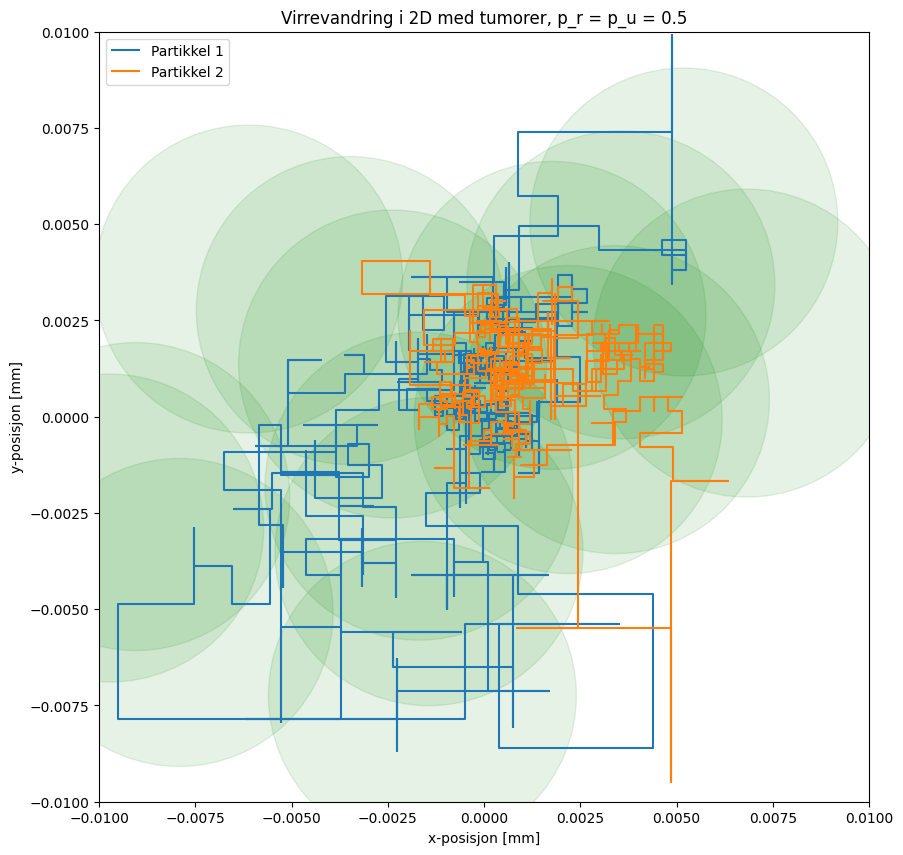

In [21]:
#Lager et random sentrum for hver tumor k innenfor området [-0.01,0.01] x [-0.01,0.01]:
s1 = np.random.uniform(-0.02/2, 0.02/2, m)
s2 = np.random.uniform(-0.02/2, 0.02/2, m)


 
figure, axes = plt.subplots(figsize = (10, 10))

#Plotter for et område som er litt større enn det begrensete område som tumorer kan oppstå
axisLim = 0.02/2
plt.xlim(-axisLim, axisLim)   
plt.ylim(-axisLim, axisLim)

#Plotter hver tumor k:
axes.set_aspect(1)
for k in range(len(s1)):
    position_for_tumor = plt.Circle((s1[k], s2[k]), np.sqrt(a/np.pi), color = "g", alpha = 0.1)
    axes.add_artist(position_for_tumor)

#Plotter banen til hver virrevandrer
x_isotrop, y_isotrop = N_virr_2D_tumor(1000, 2, 0.02/2, 0.02/2) #Henter ut x og y verdier for virrevandrene

for i in range(len(x_isotrop)):
    plt.plot(x_isotrop[i], y_isotrop[i], label = f"Partikkel {i+1}")
plt.xlabel('x-posisjon [mm]')  
plt.ylabel('y-posisjon [mm]') 
plt.legend()
plt.title('Virrevandring i 2D med tumorer, p_r = p_u = 0.5')
plt.show()

Figuren viser effekten av at hver enkelt tumor bidrar med å redusere posisjonsendringen per tidssteg, og dermed diffusjonskonstanten. Jo flere tumorer som overlapper, jo tregere beveger virrevandreren seg i det aktuelle området.

### d)

Grensebetingelsen "harde vegger" ble implentert i simuleringen i oppgave 2c), slik at virrevandrerne aldri kan krysse ut av det aktuelle området med tumorer. Virrevandrerne holdes i ro dersom de er i ferd med å foreta et steg som vil føre dem ut av området. 

Denne grensebetingelsen vil representere områder i hjernen der diffusjon til vannmolekylene begrenses av "harde vegger". For eksempel er diffusjon i blodårer sterkt begrenset mot veggene i åren. En ulempe med valget av denne grensebetingelsen vil være at virrevandreren holdes i ro dersom den prøver å krysse veggen og eventuelt bli værende i denne posisjonen om den gang etter gang vil prøve å ta det steget som fører den utenfor blodåren. Dette gir noe feil representasjon av virkeligheten da virrevandreren egentlig ville tatt et steg i ny retning. Periodiske grensebetingelser ville bedre representert dette. 

Likevel sikres mer data ved å implementere "harde vegger" enn om det ikke brukes grensebetingelser. Da kan virrevandrerne utforske hele xy-planet og forsvinne ut av det avgrensede området med tumorer som det ønskes å utforske. Når det er sagt, kan det diskuteres om virrevandrerne likevel vil bruke nok tid i det relevante området til at det samles tilstrekkelig med data. I simuleringen i oppgave 1g) er virrevandrernes startposisjon satt til origo og tumorene tilfeldig plassert rundt denne startposisjonen. Plottet i oppgave 1 i) viser at andelen virrevandrere som har returnert til origo minst en gang per tidsenhet øker raskt i starten. Virrevandrerne vil altså i dette tidsrommet være i nærheten av origo og dermed fortsatt i det aktuelle området. I simulering i oppgave 2c) ble startposisjonen til hver virrevandrer satt tilfeldig, men innenfor området som utforskes. I likhet med en startposisjon i origo vil virrevandrere med tilfeldige startposisjoner holde seg i nærheten av sitt startpunkt og dermed også i det relevante området. Det kan altså sikres nok data uten grensebetingelser, men det kommer an på faktorer som hva de tilfeldige startposisjonene til både virrevandrerne og tumorene blir samt retningsendring til virrevandrerne. Det er områder på plottet som viser potensielle steder virrevandreren kunne forsvunnet fra området uten de "harde veggene", og konklusjonen ble dermed at implementasjon av grensebetingelser var det hensiktsmessig. 

### e)


Videre introduserer vi intensiteten $I(i,j)$ på diffusjonen. Vi deler det området vi vil undersøke opp i ruter ved å dele opp i $nx$ rader og $ny$ kolonner slik at rad $i$ og kolonne $j$ er en rute. Så finner vi intensiteten assosiert med hver rute som beskrives slik

$$I(i,j) = \frac{\textrm{antall ganger en virrevandrer befinner seg i rute } i, j}{MN}.$$



In [18]:
def Intensity_arr(M, N, x, y, Lx, Ly, nx, ny):
    """
    Beskrivelse
    -------
    Deler opp det aktuelle området i en (nx,ny) gridd og retunderer 2D arrayet (nx,ny) som
    forteller hvor mange ganger en virrevandrer befinner seg i et griddpunkt (nx[i],ny[j]),
    samt 2 1D arrays for x og y punktene til griden.
    ---
    Parameters
    ----------
    M  : antall tidssteg
    N  : antall virrevandrere
    x  : 2D array med x-koordinatene til hver virrevandrer for hvert tidssteg
    y  : 2D array med y-koordinatene til hver virrevandrer for hvert tidssteg
    Lx : området langs x-aksen 
    Ly : området langs y-aksen
    nx : rader
    ny : kolonner

    Returns
    -------
    I      : Intensitet
    xedges : 1D array med x-koordinatene til hver bin i histogrammet
    yedges : 1D array med x-koordinatene til hver bin i histogrammet
    
    """
    #Multipliserer arrays:
    x = x.flatten()
    y = y.flatten()
    
    #Bruker np.histogram2d:
    xedges = np.linspace(-Lx, Lx, nx+1) #Deler x-aksen i nx 
    yedges = np.linspace(-Ly, Ly, ny+1) #Deler y-aksen i ny
                    
    I, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    
    return I, xedges, yedges

### f)

Videre beregnes intensiteten i en simulering med $15$ tumorer der tilhørende reduksjonskoeffisienter $t_k$ ikke lenger er lik 1, men tilfelig valgt innenfor intervallet ($0.3$, $0.45$). Rutenettet for simuleringen er $nx = ny = 40$ og resultatet blir illustrert.

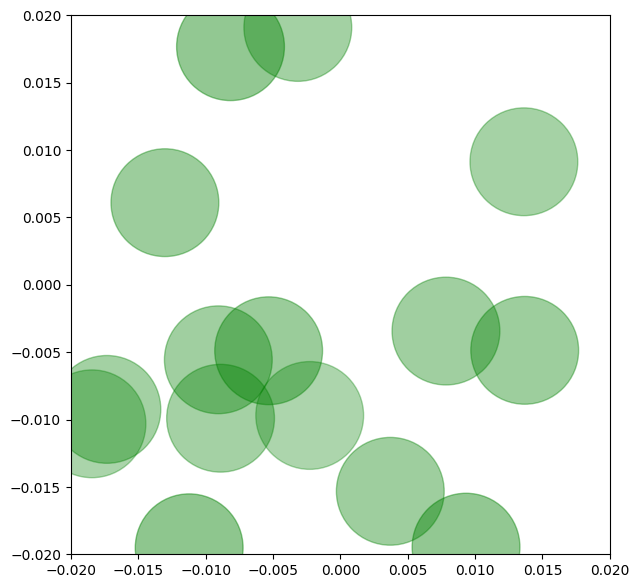

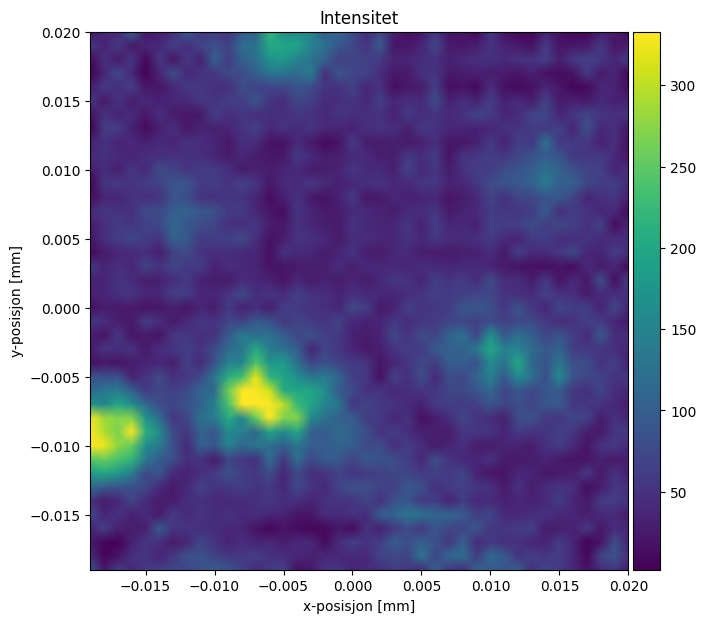

In [19]:
#Velger tk-ene tilfeldig innenfor intervallet (0.3, 0.45):
tk = np.random.uniform(0.3, 0.45, m)
n = 40
nx = n
ny = n
r = np.sqrt(a/np.pi)
L = 0.04
Lx = L/2
Ly = L/2
N = 100
M = 1000
maxPercentile = 99.5

#Lager et random sentrum for hver tumor k innenfor området [0,L/2] x [0,L/2]:
s1 = np.random.uniform(-Lx, Ly, m)
s2 = np.random.uniform(-Ly, Ly, m)

#Beregner I for simuleringen med nx = ny = 40:

figure, axes = plt.subplots(figsize=(7, 7))

axisLim = Lx

plt.xlim(-axisLim, axisLim)   
plt.ylim(-axisLim, axisLim)


#Plotter hver tumor k:
axes.set_aspect(1)
for k in range(len(s1)):
    position_for_tumor = plt.Circle((s1[k], s2[k]), np.sqrt(a/np.pi), color = "g", alpha = tk[k])
    axes.add_artist(position_for_tumor)

x, y = N_virr_2D_tumor(M, N, Lx, Ly)

#Plotter intensiteten der virrevandrere oppstår:
I_out, xedges, yedges = Intensity_arr(M, N, x, y, Lx, Ly, nx, ny)
I_transposed = I_out.T

fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(132, title='Intensitet', aspect='equal')
X, Y = np.meshgrid(xedges[1:], yedges[1:])
Map = ax.pcolormesh(X, Y, I_transposed, shading='gouraud', vmin=np.min(I_transposed), 
vmax=np.percentile(I_transposed, maxPercentile)) # Setter max verdi til plottet til 99.5 percentil
                                                 # får å fjærne ekstreme verdier
plt.xlabel('x-posisjon [mm]')  
plt.ylabel('y-posisjon [mm]') 
###---Definerer colorbar og setter max høyde lik figsize-----
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(Map, cax=cax)
###----------
plt.show()

Intensiteten $I(i,j)$ beskriver opphopning av virrevandrere. Dette vil skje i områder med lav diffusjon når det er opphopning av tumorer. Det kan observeres fra plottene da det er en høy intensitet i området der det er opphopning av virrevandrere. Intensiteten kan altså brukes til å detektere området der flest tumorer befinner seg, mens hver tumors posisjon alene illustreres dårlig i dette intensitetsplottet. Størrelsen på tumorene er også mindre representative her. Det blir heller en illustrasjon av størrelsen på overlapp mellom flere tumorer. Når det er sagt, gir intensiteten en god representasjon av hvor opphopningen er verst.

Om virrevandrerne derimot rekker å bevege seg innom større deler av det aktuelle området vil intensiteten detektere både posisjon og størrelse tydeligere. Dette kan oppnås med økt antall virrevandrere $N$ og tidssteg $M$ samt et mindre område $L\times L$. Da beveger flere virrevandrerne seg over lengre tid og på et mindre område. Som resultat blir intensitetsforskjellen mellom områder der det er tumorer og der det ikke er tumorer større. Da blir hver tumors posisjon og størrelse mer nøyaktig i intensitetsplottet. Initialposisjonen til virrevandrerne påvirker også resultatene på intensiteten. Ved å initialisere virrevandrernes startposisjoner tilfeldig oppnås også at virrevandrernes bevegelse dekker større deler av det området som utforskes da de starter i forskjellige posisjoner. 

Størrelsen $L$ på området påvirker hvor tett tumorene blir plassert, og dermed hvor mye de vil overlappe. Dette vil også ha innvirkning på hvorvidt intensitetsplottet kan brukes til å detektere tumorene. I områder med mye overlapp vil intensiteten bli langt høyere enn der det bare finnes enkelttumorer, og det kan derfor bli vanskelig å se disse i plottet. Man kan prøve å korrigere for dette ved å sette maksimum representerbare intensitet i plottet som en lavere intensitet enn den faktiske maksimale intensiteten i dataene. Vi har satt max intensitet i plottet til å være $70 \% $ av den reelle maxverdien.

Her har vi valgt å bruke $N = 100$ og $M = 1000$. Hvis vi bruker et tilstrekkelig antall tidssteg, ser vi at resultatet når vi bruker f.eks. $N = 10$ og $N = 100$ ikke blir veldig annerledes. Vi valgte derfor å ikke overdrive antall virrevandrere, siden dette øker kjøretiden til simuleringen. (Det er kanskje bedre å bruke mange virrevandrere, framfor mange tidssteg, siden simuleringen da blir mindre påvirket av virrevandrernes startposisjon? Dessuten vil dette være mer likt et reelt system, og valget av grensebetingelser (som i vårt tilfelle kanskje ikke er de mest realistiske) vil ha mindre å si hvis vi ser på virrevandringen i løpet av et kort tidsrom.) 

### g)

Til slutt brukes et Sobel-filter på simuleringen som er et verktøy for kantdeteksjon. Dette filteret skal gi en tydeligere avbildning til presist anslå tumorenes posisjon. 

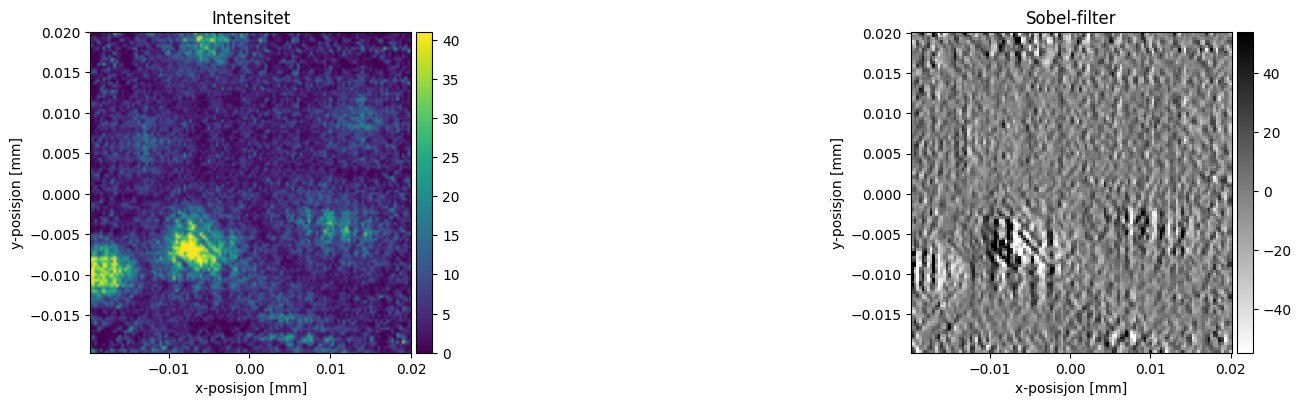

In [20]:
nGridPkt = 120 # 3 ganger oppløsningen fra oppgave 2f
nx = nGridPkt
ny = nGridPkt 
I_out2, xedges2, yedges2 = Intensity_arr(M, N, x, y, Lx, Ly, nx, ny)
I_transposed2 = I_out2.T


#------------
# Definerer bildestørrelse til plottene og bruker add_subplots til å sette plottene ved siden
# av hverandre for å sammenligne med Sobel-filteret:
#-----------

fig = plt.figure(figsize=(25, 25))

#Intensitet:
ax = fig.add_subplot(131, title='Intensitet', aspect='equal')
X, Y = np.meshgrid(xedges2[1:], yedges2[1:]) #Fjerner en rad og kolonne for å få 'gouraud' shading til å fungere
Map = ax.pcolormesh(X, Y, I_transposed2, shading='gouraud', 
vmin=np.min(I_transposed2), vmax=np.percentile(I_transposed2, maxPercentile)) # Setter max verdi til I_transposed2 til maxPercentile percentil
plt.xlabel('x-posisjon [mm]')  
plt.ylabel('y-posisjon [mm]') 
###---Definerer colorbar og setter max høyde lik figsize-----
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(Map, cax=cax)
###-------

#Sobel-filter:
ax = fig.add_subplot(133, title='Sobel-filter', aspect='equal')
result = ndimage.sobel(I_transposed2)
Map = ax.pcolormesh(X, Y, result, cmap='binary', 
vmin=np.percentile(result, 100-maxPercentile), vmax=np.percentile(result, maxPercentile))
# Setter max og min verdi til sobel til maxPercentile 
# percentil og 100-maxPercentile percentil av verdiene til result for bedre mapping
plt.xlabel('x-posisjon [mm]')  
plt.ylabel('y-posisjon [mm]') 
###---Definerer colorbar og setter max høyde lik figsize-----
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(Map, cax=cax)
###--------
fig.set_figwidth(15)
fig.set_figheight(10)
plt.show()

Ved å velge lav oppløsning $n$ er det lettere å skille tumorer fra hverandre, både deres verdi på reduksjonskoeffisienten og overlapp med andre tumorer. Likevel illustrerer ikke en lav oppløsning alle tumorer, men fler enn ved en høyere oppløsning. Fordelen med en høyere oppløsning er derimot at den er mer presis i posisjoneringen av overlappene. En høyere verdi av $n$ vil gi mer nøyaktig data på området der opphopningen er verst. Samtidig må ikke oppløsningen velges for høy, da dette vil gi motsatt effekt. Dette er fordi intensiteten er proposjonal med antallet registrerte virrevandrere som passerer hver enkel rute. Når området er oppløst i så mange ruter blir det mindre sannsynlig at hver virrevandrer går igjennom samme rute flere ganger som ville økt antall registrerte. Det vil altså bli vanskeligere å registrere intensiteten ved for høy oppløsning.

Ved plotting av dataene i sobel-filteret og intensitetsdiagram får vi i utgangspunktet et utydelig bilde fordi dataene vil inneholde noen ekstreme verdier. Dette fordi partiklene starter i origo og kan bruke mange steg på å bevege seg bort fra origo hvis det ikke er tumorer i nærheten som kan redusere steglengden. Får å få et tydeligere plott må vi redusere maksimumsverdien for plottet, og eventuelt øke minimumsverdien, slik at intervallet for fargerepresentasjonen bedre tilsvarer de verdiene vi er interessert i å vise. En enkel prosent skalering av maksimums- og minimumsverdi vil skape problemer når man varierer antall gridpunkter, samt antall virrevandrere og tidstegn. Får å få en mer fleksibel fastsettelse av disse grensene velger vi å benytte persentil verdier som maksimums- og minimumsverdier. Prøving og feiling har vist at 0.5 og 99.5 persentiler gir gode resultater med et fornuftig antall gridpunkter.



## Konklusjon

Målinger av virrevandringen til vannmolekyler i vev kan brukes til å identifisere kreftsvulster, ved å måle forskjeller i diffusjonen i vevet. Diffusjonskonstanten er lavere i vev med høyere celletetthet. I dette prosjektet har vi gjort simuleringer av virrevandring i én og to dimensjoner, og brukt disse til å detektere tumorer. Tumorene bidrar med å redusere diffusjonskonstanten og jo flere tumorer som overlapper desto lavere blir diffusjonen. Grensebetingelsen "harde vegger", dvs. at virrevandrerne ikke kan bevege seg ut av et visst område, ble implementert. Dette valget er ikke helt i samsvar med et reelt system, men det ga oss mer data for diffusjonen i det aktuelle området. Videre detekterte intensitetsplottet tumorenes posisjon og størrelse godt ved $N = 100$, $M = 1000$ og $L = 0.04$. Oppløsningen $n$ til plottet måtte verken velges for lav eller for høy. For lav ga unøyaktig posisjonering og størrelse av tumorene, mens for høy fanget opp intensiteten for dårlig. Vi benyttet også et Sobel-filter til kantdeteksjon for å få et plott med tydeligere kontraster, men det kan diskuteres om dette gjorde det enklere å identifisere tumorene enn ved å se på intensitetsplottet alene. Likevel har vi oppnådd en slags medisinsk avbildning av hvor tumorene befinner seg. 



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41dbab82-afc0-467b-830b-7b2cbb28d935' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>